# COVID-19 Vaccination Progress — Data Wrangling (Milestone 1)
**Role:** Ryan Weeks, Data Wrangler

**Objective:** I will acquire the Kaggle dataset, inspect both CSVs for structure and consistency, summarize missingness, and run light EDA that gives the scientist initial direction.


In [2]:
import os
from pathlib import Path
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)

# Viz style
plt.style.use("seaborn-v0_8-whitegrid")

# Folders
DATA_DIR = Path("data")
RAW_DIR = DATA_DIR / "raw"
PROCESSED_DIR = DATA_DIR / "processed"
RAW_DIR.mkdir(parents=True, exist_ok=True)
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
# Dataset: https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress
path = kagglehub.dataset_download("gpreda/covid-world-vaccination-progress")
print("Downloaded to:", path)
print("Files:", os.listdir(path))

Downloaded to: C:\Users\Weekseey\.cache\kagglehub\datasets\gpreda\covid-world-vaccination-progress\versions\249
Files: ['country_vaccinations.csv', 'country_vaccinations_by_manufacturer.csv']


## Load in Both CSVs

In [5]:
# Load both CSVs

vacc = pd.read_csv(f"{path}/country_vaccinations.csv", parse_dates=["date"])
mfg  = pd.read_csv(f"{path}/country_vaccinations_by_manufacturer.csv", parse_dates=["date"])

print(f"vacc shape: {vacc.shape}")
print(f"mfg shape:  {mfg.shape}")

display(vacc.head(3))
display(mfg.head(3))

vacc shape: (86512, 15)
mfg shape:  (35623, 4)


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2
1,Argentina,2020-12-29,Oxford/AstraZeneca,3
2,Argentina,2020-12-29,Sinopharm/Beijing,1


## Data Structure Checks

In [7]:
# Structure Checks

def profile(df, name):
    print(f"=== {name}: info ===")
    df.info()
    print("\n=== Missing values per column ===")
    print(df.isna().sum().sort_values(ascending=False))
    print("\n=== Sample numeric summary ===")
    display(df.select_dtypes(include=[np.number]).describe().T)

profile(vacc, "Vaccinations Data")
profile(mfg, "Manufacturer Data")

=== Vaccinations Data: info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   iso_code                             86512 non-null  object        
 2   date                                 86512 non-null  datetime64[ns]
 3   total_vaccinations                   43607 non-null  float64       
 4   people_vaccinated                    41294 non-null  float64       
 5   people_fully_vaccinated              38802 non-null  float64       
 6   daily_vaccinations_raw               35362 non-null  float64       
 7   daily_vaccinations                   86213 non-null  float64       
 8   total_vaccinations_per_hundred       43607 non-null  float64       
 9   people_vaccinated_per_hundred        41294 non-null

,count,mean,std,min,25%,50%,75%,max
total_vaccinations,43607.0,4.592964e+07,2.246004e+08,0.0,526410.00,3590096.000,1.701230e+07,3.263129e+09
people_vaccinated,41294.0,1.770508e+07,7.078731e+07,0.0,349464.25,2187310.500,9.152520e+06,1.275541e+09
people_fully_vaccinated,38802.0,1.413830e+07,5.713920e+07,1.0,243962.25,1722140.500,7.559870e+06,1.240777e+09
daily_vaccinations_raw,35362.0,2.705996e+05,1.212427e+06,0.0,4668.00,25309.000,1.234925e+05,2.474100e+07
daily_vaccinations,86213.0,1.313055e+05,7.682388e+05,0.0,900.00,7343.000,4.409800e+04,2.242429e+07
total_vaccinations_per_hundred,43607.0,8.018854e+01,6.791358e+01,0.0,16.05,67.520,1.327350e+02,3.453700e+02
people_vaccinated_per_hundred,41294.0,4.092732e+01,2.929076e+01,0.0,11.37,41.435,6.791000e+01,1.247600e+02
people_fully_vaccinated_per_hundred,38802.0,3.552324e+01,2.837625e+01,0.0,7.02,31.750,6.208000e+01,1.223700e+02
daily_vaccinations_per_million,86213.0,3.257049e+03,3.934312e+03,0.0,636.00,2050.000,4.682000e+03,1.174970e+05


=== Manufacturer Data: info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   location            35623 non-null  object        
 1   date                35623 non-null  datetime64[ns]
 2   vaccine             35623 non-null  object        
 3   total_vaccinations  35623 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.1+ MB

=== Missing values per column ===
location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64

=== Sample numeric summary ===


,count,mean,std,min,25%,50%,75%,max
total_vaccinations,35623.0,1.508357e+07,5.181768e+07,0.0,97776.0,1305506.0,7932423.0,600519998.0


---

## Observations from Structure Check

### Vaccinations Dataset
- **Shape:** 86,512 rows × 15 columns.  
  Each record represents a country–date combination with cumulative and daily vaccination metrics.
- **Missingness:** Roughly 40–50% of rows have missing values for cumulative totals (`total_vaccinations`, `people_vaccinated`, `people_fully_vaccinated`) and their corresponding per-hundred fields.  
  Daily metrics (`daily_vaccinations`, `daily_vaccinations_per_million`) are nearly complete, suggesting daily reporting is more consistent than cumulative tracking.
- **Data types:** The `date` column successfully parsed to datetime, and all numeric fields are floats. Metadata fields such as `country`, `iso_code`, and `source_name` are strings.
- **Outliers and scale:** Several very large cumulative totals (up to ~3.2B) appear reasonable for highly populated regions. Some per-hundred values exceed 100, likely due to population estimation or reporting inconsistencies.

### Manufacturer Dataset
- **Shape:** 35,623 rows × 4 columns.  
  Each record represents a country–vaccine–date combination with cumulative dose counts.
- **Missingness:** None detected — all fields are complete and properly typed.
- **Data types:** `date` is datetime, `total_vaccinations` is numeric, and text columns (`location`, `vaccine`) are clean.
- **Scale:** Maximum cumulative count of ~600M doses, which aligns with expected totals from large-scale vaccination campaigns.

### Initial Takeaways
- The **Vaccinations dataset** will drive most analyses (coverage rates, daily trends, per-country comparisons).
- The **Manufacturer dataset** provides additional detail for brand-level insights.
- Before cleaning, we’ll standardize naming (`location` → `country`) and verify that manufacturer-level totals align with the overall vaccination totals.


---

## Next Steps: Light Cleaning and Alignment

Now that I’ve reviewed the structure and missingness in both datasets, I want to:
1. Perform light cleaning (remove any extra spaces and confirm numeric types).
2. Align the country column between the two datasets (the manufacturer file uses `location` instead of `country`).
3. Drop any duplicate or invalid rows.
4. Double-check that everything looks consistent before moving into deeper checks.


In [12]:
# Trim whitespace from all string (object) columns

for df in [vacc, mfg]:
    str_cols = df.select_dtypes(include="object").columns
    df[str_cols] = df[str_cols].apply(lambda s: s.str.strip())

print("String trimming complete.")

String trimming complete.


In [13]:
# Rename 'location' to 'country' for consistency
if "location" in mfg.columns and "country" not in mfg.columns:
    mfg = mfg.rename(columns={"location": "country"})

print("Manufacturer dataset columns:", mfg.columns.tolist())

Manufacturer dataset columns: ['country', 'date', 'vaccine', 'total_vaccinations']


In [14]:
# Convert numeric-like columns in vaccinations table to float
numeric_like = [
    "total_vaccinations","people_vaccinated","people_fully_vaccinated",
    "daily_vaccinations_raw","daily_vaccinations",
    "total_vaccinations_per_hundred","people_vaccinated_per_hundred",
    "people_fully_vaccinated_per_hundred","daily_vaccinations_per_million"
]

for c in numeric_like:
    if c in vacc.columns:
        vacc[c] = pd.to_numeric(vacc[c], errors="coerce")

print("Numeric coercion complete for vaccination dataset.")

Numeric coercion complete for vaccination dataset.


In [15]:
# Remove duplicates and any rows missing country or date
vacc = vacc.drop_duplicates().dropna(subset=["country", "date"])
mfg  = mfg.drop_duplicates().dropna(subset=["country", "date"])

print(f"Vaccinations shape: {vacc.shape}")
print(f"Manufacturer shape: {mfg.shape}")

Vaccinations shape: (86512, 15)
Manufacturer shape: (35623, 4)


---

## Checking Consistency Between Datasets

Before exploring patterns or trends, I want to make sure both datasets are internally consistent.
Specifically, I’ll check for:
- Duplicate entries by key fields (`country` and `date` in the vaccination data, and `country`, `date`, `vaccine` in the manufacturer data)
- Required columns that should always be present
- Whether the summed manufacturer totals align closely with the overall vaccination totals for each country and date


In [18]:
# Check for duplicate key combinations

vacc_dups = vacc.duplicated(subset=["country", "date"]).sum()
mfg_dups  = mfg.duplicated(subset=["country", "date", "vaccine"]).sum()

print(f"Duplicate country-date pairs in vaccination data: {vacc_dups}")
print(f"Duplicate country-date-vaccine rows in manufacturer data: {mfg_dups}")

Duplicate country-date pairs in vaccination data: 0
Duplicate country-date-vaccine rows in manufacturer data: 0


In [19]:
# Verify key columns are present

required_vacc = {"country", "date", "total_vaccinations"}
required_mfg  = {"country", "date", "vaccine", "total_vaccinations"}

print("Vaccination data has required columns:", required_vacc.issubset(vacc.columns))
print("Manufacturer data has required columns:", required_mfg.issubset(mfg.columns))

Vaccination data has required columns: True
Manufacturer data has required columns: True


In [20]:
# Compare manufacturer totals vs. overall totals for each country/date

tolerance = 0.05  # 5% margin for reporting lag

# Aggregate manufacturer totals
mfg_sum = (
    mfg.groupby(["country", "date"], as_index=False)["total_vaccinations"]
      .sum()
      .rename(columns={"total_vaccinations": "mfg_total"})
)

# Merge with vaccination totals
comparison = mfg_sum.merge(
    vacc[["country", "date", "total_vaccinations"]],
    on=["country", "date"],
    how="left"
)

# Flag rows where manufacturer sum exceeds overall total by more than the tolerance
comparison["exceeds"] = (
    comparison["mfg_total"].notna() &
    comparison["total_vaccinations"].notna() &
    (comparison["mfg_total"] > (1 + tolerance) * comparison["total_vaccinations"])
)

print(f"Rows compared: {len(comparison)}")
print(f"Exceedances > {int(tolerance * 100)}%: {int(comparison['exceeds'].sum())}")

# Show sample exceedances if any exist
comparison.loc[comparison["exceeds"], ["country", "date", "mfg_total", "total_vaccinations"]].head(10)

Rows compared: 9046
Exceedances > 5%: 90


,country,date,mfg_total,total_vaccinations
520,Belgium,2021-01-08,28332,24870.0
521,Belgium,2021-01-15,127709,119777.0
591,Bulgaria,2021-02-19,119353,104268.0
1103,Croatia,2021-01-08,31853,24985.0
1104,Croatia,2021-01-15,50613,41532.0
1105,Croatia,2021-01-22,74864,64951.0
1106,Croatia,2021-01-29,91663,80000.0
1112,Croatia,2021-03-12,365841,300956.0
1113,Croatia,2021-03-19,433745,365082.0
1114,Croatia,2021-03-26,497391,416745.0


---

## Consistency Observations

- A total of **9,046** country–date pairs were compared between the vaccination and manufacturer datasets.
- Only **90 rows (≈1%)** showed manufacturer totals exceeding the overall reported totals by more than 5%.  
  This is a small margin of inconsistency and suggests the two sources are mostly aligned.

### Possible causes of exceedances
- **Reporting lag:** Manufacturer-specific data may be updated earlier than aggregated national totals.
- **Rounding or data refresh timing:** Some daily reports may reflect partial updates or late revisions.
- **Different aggregation sources:** National totals may exclude certain doses (e.g., private or regional campaigns) that are captured in manufacturer data.

### Conclusion
The datasets are generally consistent and reliable for analysis.  
Minor discrepancies are expected and can be safely tolerated without major data adjustments.


---

---

# Exploring the Data

Now that the datasets are cleaned and validated, I want to get an initial feel for how vaccinations progressed globally.
This includes:
- Looking at the distribution of daily vaccination counts to understand reporting variation.
- Identifying which countries have reached the highest vaccination coverage.
- Visualizing a few major countries over time to see how their daily trends evolved.


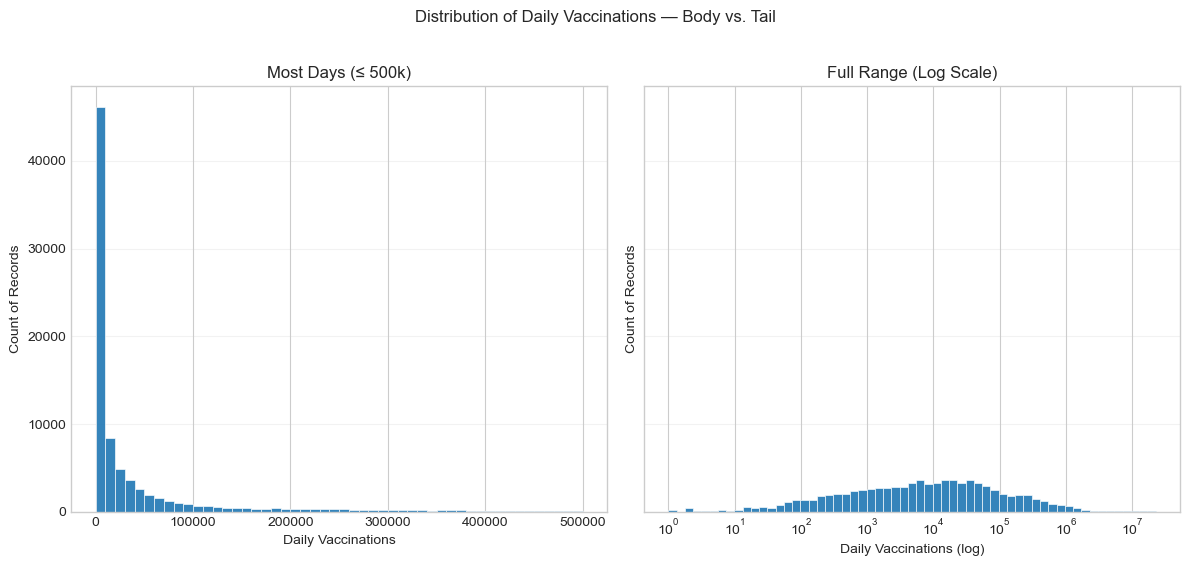

In [26]:
x = vacc["daily_vaccinations"].dropna()
x = x[x > 0]

fig, axes = plt.subplots(1, 2, figsize=(12, 5.5), sharey=True)

# Left: body (<= 500k)
body = x[x <= 500_000]
axes[0].hist(body, bins=50, alpha=0.9, edgecolor="white", linewidth=0.5)
axes[0].set_title("Most Days (≤ 500k)")
axes[0].set_xlabel("Daily Vaccinations")
axes[0].grid(axis="y", alpha=0.25)

# Right: full range (log scale, no trimming)
bins = np.logspace(np.log10(x.min()), np.log10(x.max()), 60)
axes[1].hist(x, bins=bins, alpha=0.9, edgecolor="white", linewidth=0.5)
axes[1].set_xscale("log")
axes[1].set_title("Full Range (Log Scale)")
axes[1].set_xlabel("Daily Vaccinations (log)")

for ax in axes:
    ax.set_ylabel("Count of Records")
    ax.grid(axis="y", alpha=0.25)

plt.suptitle("Distribution of Daily Vaccinations — Body vs. Tail", y=1.02, fontsize=12)
plt.tight_layout()
plt.show()

### Understanding the Body vs. Tail View
Splitting the data into two panels highlights how vaccination counts behave on typical days versus rare extremes.  
The left plot shows the majority of days (under 500k), while the right log-scale plot reveals the long tail of very large daily reports.  

> **Interpretation Note:**  
> These panels use different x-axis scales to focus on different parts of the distribution.  
> The left uses a linear axis to show normal daily activity, while the right uses a logarithmic axis for extreme values.  
> Bar widths shouldn’t be compared directly between the two plots since each uses separate binning.


---

## Top Countries by Fully Vaccinated per 100

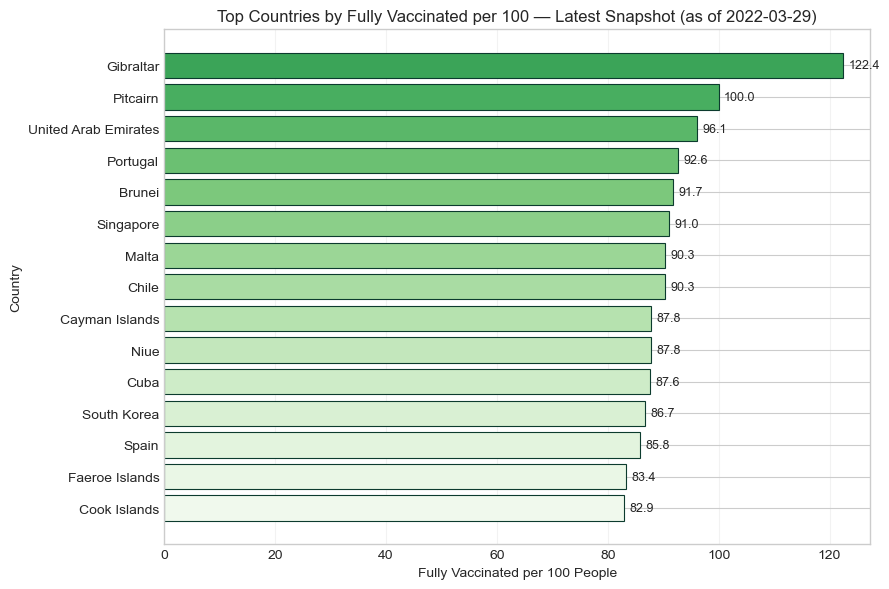

In [28]:
# Latest snapshot per country
latest_idx = vacc.sort_values("date").groupby("country")["date"].idxmax()
latest = vacc.loc[latest_idx, ["country", "date", "people_fully_vaccinated_per_hundred"]].copy()

# Top 15
top = (latest.dropna(subset=["people_fully_vaccinated_per_hundred"])
             .sort_values("people_fully_vaccinated_per_hundred", ascending=False)
             .head(15))

# N distinct Green Gradient
N = len(top)
cmap = plt.cm.get_cmap("Greens_r")
palette = cmap(np.linspace(0.35, 0.95, N))  # trim to avoid extremes

# Plot
as_of = pd.to_datetime(latest["date"]).max().date()
y = top["country"][::-1]
x = top["people_fully_vaccinated_per_hundred"][::-1]
colors = palette[::-1]  # keep high values dark

fig, ax = plt.subplots(figsize=(9, 6))
bars = ax.barh(y, x, color=colors, edgecolor="#0c3b2e", linewidth=0.8)

# Labels
for b in bars:
    w = b.get_width()
    ax.text(w + 1, b.get_y() + b.get_height()/2, f"{w:.1f}", va="center", fontsize=9)

# Styling
xmax = float(top["people_fully_vaccinated_per_hundred"].max())
ax.set_xlim(0, max(100, xmax + 5))
ax.set_xlabel("Fully Vaccinated per 100 People")
ax.set_ylabel("Country")
ax.set_title(f"Top Countries by Fully Vaccinated per 100 — Latest Snapshot (as of {as_of})")
ax.grid(axis="x", alpha=0.25)
plt.tight_layout()
plt.show()

### Refining the Top Country Comparison
I'm going to recreate the same plot but remove micro territories.  
Small regions like `Gibraltar` or `Pitcairn` can appear unrealistically high due to their tiny populations, so filtering them out gives a clearer view of how larger countries compare.

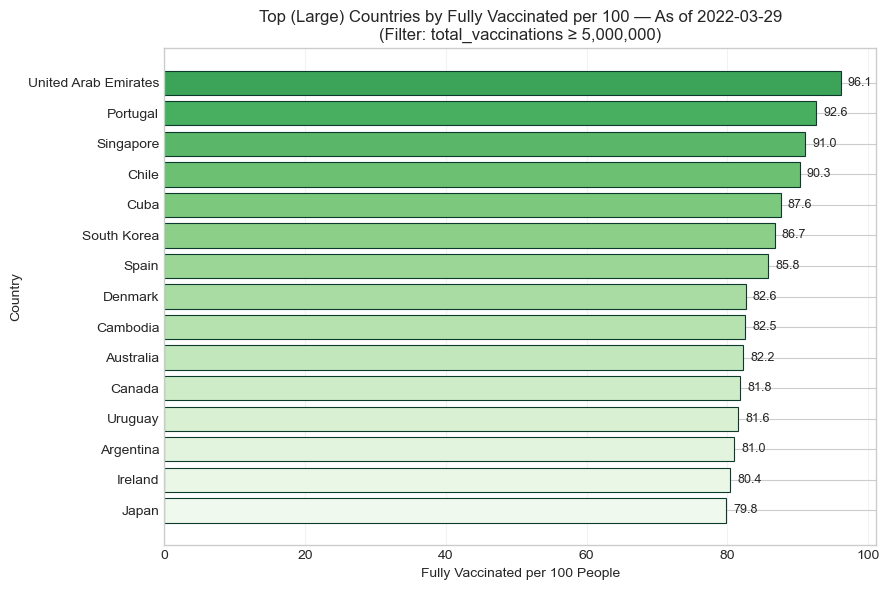

In [30]:
# Latest snapshot with totals
latest_idx = vacc.sort_values("date").groupby("country")["date"].idxmax()
latest = vacc.loc[latest_idx, ["country", "date",
                               "people_fully_vaccinated_per_hundred",
                               "total_vaccinations"]].copy()

# Keep large vaccination programs (≥ 5M)
threshold = 5_000_000
big = latest[(latest["total_vaccinations"] >= threshold) &
             (latest["people_fully_vaccinated_per_hundred"].notna())]

top_big = big.sort_values("people_fully_vaccinated_per_hundred", ascending=False).head(15)

# Reversed discrete green shades (dark = high)
N = len(top_big)
cmap = plt.cm.get_cmap("Greens_r")
palette = cmap(np.linspace(0.35, 0.95, N))
colors = palette[::-1]

# Plot
as_of = pd.to_datetime(latest["date"]).max().date()
y = top_big["country"][::-1]
x = top_big["people_fully_vaccinated_per_hundred"][::-1]

fig, ax = plt.subplots(figsize=(9, 6))
bars = ax.barh(y, x, color=colors, edgecolor="#0c3b2e", linewidth=0.8)

# Labels
for b in bars:
    w = b.get_width()
    ax.text(w + 1, b.get_y() + b.get_height()/2, f"{w:.1f}", va="center", fontsize=9)

# Styling
xmax = float(top_big["people_fully_vaccinated_per_hundred"].max())
ax.set_xlim(0, max(100, xmax + 5))
ax.set_xlabel("Fully Vaccinated per 100 People")
ax.set_ylabel("Country")
ax.set_title(f"Top (Large) Countries by Fully Vaccinated per 100 — As of {as_of}\n(Filter: total_vaccinations ≥ {threshold:,})")
ax.grid(axis="x", alpha=0.25)
plt.tight_layout()
plt.show()

### Top Countries by Full Vaccination (Micro Territories Removed)
After filtering out small regions with inflated rates, the ranking highlights countries with large-scale vaccination programs.  
`United Arab Emirates`, `Portugal`, and `Singapore` lead among nations with over 5 million total doses administered.


---

## Daily Vaccinations for Selected Countries (Rolling Average)

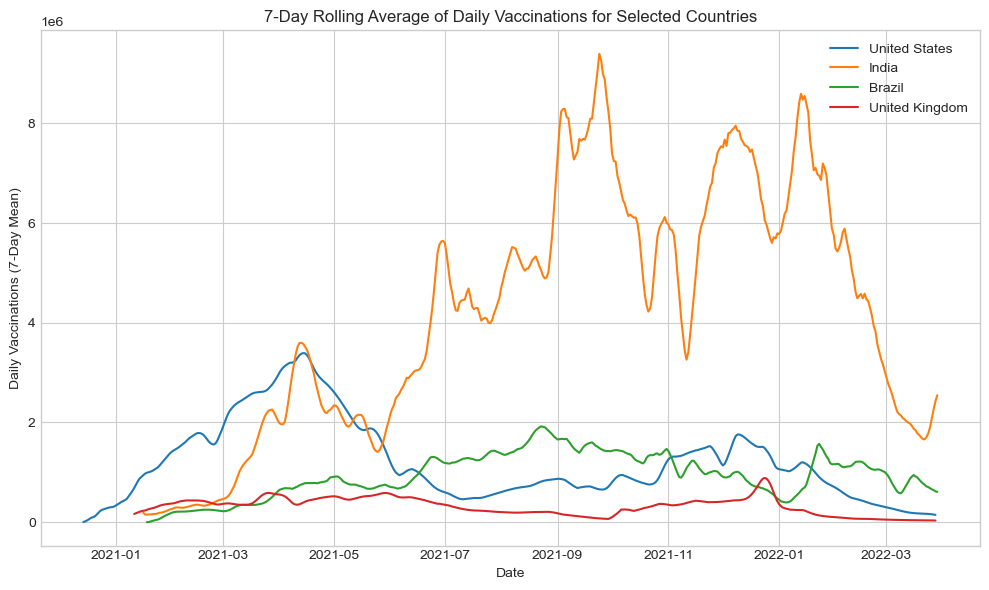

In [32]:
# Choose sample countries to compare
example_countries = ["United States", "India", "Brazil", "United Kingdom"]
subset = vacc[vacc["country"].isin(example_countries)].copy()
subset = subset.sort_values(["country", "date"])

plt.figure(figsize=(10,6))
for c in example_countries:
    s = subset[subset["country"] == c]
    plt.plot(
        s["date"],
        s["daily_vaccinations"].rolling(7, min_periods=1).mean(),
        label=c
    )

plt.title("7-Day Rolling Average of Daily Vaccinations for Selected Countries")
plt.xlabel("Date")
plt.ylabel("Daily Vaccinations (7-Day Mean)")
plt.legend()
plt.tight_layout()
plt.show()

### 7-Day Rolling Average of Daily Vaccinations
This chart shows 7-day rolling averages for selected countries to smooth out daily reporting noise.  

- `India` shows the highest peaks in vaccination activity.  
- Followed by the `United States`.  
- `Brazil` and the `United Kingdom` maintained steadier, lower rates over time.  

> **Note:**  
> This type of rolling analysis can be repeated for any specific country or region  
> to compare vaccination rollout trends or identify policy-driven surges.


---

In [67]:
# Convert country names to continents automatically
import pycountry_convert as pc

def get_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return None

vacc["Continent"] = vacc["country"].apply(get_continent)

# Check which countries failed to map
unmapped = vacc[vacc["Continent"].isna()]["country"].unique()
print(f"Unmapped countries ({len(unmapped)}):")
print(unmapped)

Unmapped countries (14):
['Bonaire Sint Eustatius and Saba' "Cote d'Ivoire" 'Curacao'
 'Democratic Republic of Congo' 'England' 'Faeroe Islands' 'Kosovo'
 'Northern Ireland' 'Pitcairn' 'Saint Helena' 'Scotland'
 'Sint Maarten (Dutch part)' 'Timor' 'Wales']


In [69]:
# Patch unmapped countries
fixes = {
    "Bonaire Sint Eustatius and Saba": "North America",
    "Cote d'Ivoire": "Africa",
    "Curacao": "North America",
    "Democratic Republic of Congo": "Africa",
    "England": "Europe",
    "Faeroe Islands": "Europe",
    "Kosovo": "Europe",
    "Northern Ireland": "Europe",
    "Pitcairn": "Oceania",
    "Saint Helena": "Africa",
    "Scotland": "Europe",
    "Sint Maarten (Dutch part)": "North America",
    "Timor": "Asia",
    "Wales": "Europe"
}

vacc["Continent"] = vacc["Continent"].fillna(vacc["country"].map(fixes))

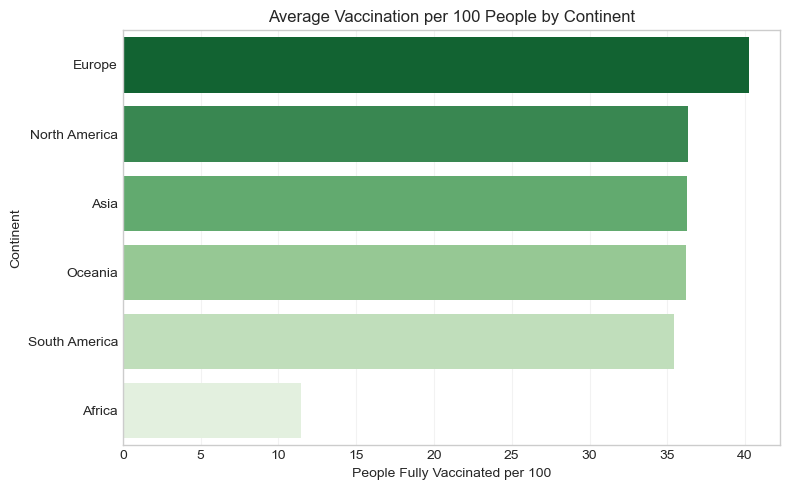

In [73]:
# Group by continent and calculate average vaccination rate
continent_avg = (
    vacc.groupby("Continent")["people_fully_vaccinated_per_hundred"]
        .mean()
        .sort_values(ascending=False)
)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=continent_avg.values, y=continent_avg.index, palette="Greens_r")

# Labels and styling
ax.set_title("Average Vaccination per 100 People by Continent")
ax.set_xlabel("People Fully Vaccinated per 100")
ax.set_ylabel("Continent")
ax.grid(axis="x", alpha=0.25)
plt.tight_layout()
plt.show()

### Average Vaccination by Continent
This visualization compares average full vaccination rates across continents.  
`Europe` leads globally, followed by `North America` and `Asia`, while `Africa` remains the least vaccinated region overall.  

> **Note:**  
> 14 countries and territories (including `England`, `Kosovo`, and `Cote d'Ivoire`)  
> were manually mapped to their correct continents to ensure accurate regional grouping.


---

## Vaccine Manufacturer Snapshot

In [87]:
mfg["vaccine"].value_counts().head(10)

vaccine
Pfizer/BioNTech       8888
Moderna               6641
Oxford/AstraZeneca    6633
Johnson&Johnson       5514
Sinovac               2413
Novavax               1692
Sinopharm/Beijing     1502
Sputnik V              977
CanSino                894
Covaxin                469
Name: count, dtype: int64

### Overview of Vaccine Manufacturers
A brief review of the manufacturer dataset (`mfg`) highlights clear global leaders in vaccine distribution.  
`Pfizer/BioNTech`, `Moderna`, `Oxford/AstraZeneca`, and `Johnson&Johnson` appear far more frequently than any other manufacturers,  
reflecting their dominant role in worldwide vaccination efforts.  
Beyond these four, vaccine types like `Sinovac`, `Novavax`, and `Sinopharm/Beijing` appear far less often,  
indicating more regionally limited deployment.


---

---

## Summary of Findings
The dataset was cleaned, validated, and feature-engineered to support analysis.  
This included parsing date fields, creating time-based columns, mapping countries to continents, and ensuring consistent structure across both datasets.  

Exploration covered several perspectives — distribution, geography, and time — revealing that:  
- Global daily vaccination counts are heavily skewed, with a few large reporting spikes dominating totals.  
- Micro territories inflate per-hundred rankings, so filtering by total doses gives a more realistic global view.  
- Rolling 7-day averages highlight major campaign surges, with `India` and the `United States` leading peak activity.  
- Continental trends show `Europe` and `North America` leading in vaccination coverage, while `Africa` lags overall.  
- A review of the manufacturer dataset (`mfg`) shows clear dominance by `Pfizer/BioNTech`, `Moderna`, `Oxford/AstraZeneca`, and `Johnson&Johnson`, with others like `Sinovac` and `Novavax` playing smaller regional roles.  

Together, these findings confirm that the data is clean, standardized, and provides a reliable foundation for modeling and deeper statistical analysis.


---

## Preparing Data for the Scientist
With the datasets fully structured and engineered for analytical readiness,  
the next phase can focus on modeling, segmentation, and uncovering broader relationships.  

Recommended next steps for the Data Scientist include:  
- **Time-Series Modeling:** Use forecasting techniques (e.g., ARIMA, Prophet) to project future vaccination trends by country or region.  
- **Segmentation & Clustering:** Group countries based on vaccination rates or growth patterns to uncover rollout efficiency differences.  
- **Correlation Analysis:** Integrate external socioeconomic data (e.g., GDP, population density, healthcare infrastructure) to identify key factors influencing vaccination progress.  
- **Manufacturer Impact:** Explore whether certain vaccine brands are associated with faster or more sustained rollout rates.  

The dataset is now fully prepared for advanced modeling, interpretation, and predictive analytics to drive meaningful insights.
